# Intro
In this assignement you will see a little example about
*   How to download a dataset
*   How to load it into dataframes
*   How to use extract basic features from the corpus
*   How to train a classifier on those features

You are advised to look at the code and understand it.

You will be then asked to perform feature extraction and classification yourself.

The task that will be addressed is document classification, specifically tasks related to sentiment classification.


# Document Classification Tutorial

## Preliminary Steps
These are some preliminary steps before addressing the task.
Import some basic libraries and set a variable that will be used in multiple steps.

In [1]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation

In [2]:
dataset_name = "aclImdb"

CHANGED: If it is necessary, clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

IMPORTANT: DO NOT RUN THIS SECTION UNLESS YOU NEED IT.


In [ ]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

Current work directory: /content
Cleaned


## Dataset Download
Dowload the Imdb movie reviews dataset


In [3]:
import urllib.request  #  download files
import tarfile  #  unzip files

dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = tarfile.open(dataset_path)
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful download
Successful extraction


Look at the files you have downloaded to understand the structure of the dataset.

## Create the dataframe
Now the dataset is loaded into a dataframe to be more accessible.
During the creation some data will be printed as an example.

In [4]:
dataset_name = "aclImdb"

debug = True

dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, split, sentiment)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path):
                    # open the file
                    with open(file_path, mode='r', encoding='utf-8') as text_file:
                        # read it and extract informations
                        text = text_file.read()
                        score = filename.split("_")[1].split(".")[0]
                        file_id = filename.split("_")[0]

                        num_sentiment = -1

                        if sentiment == "pos" : num_sentiment = 1
                        elif sentiment == "neg" : num_sentiment = 0

                        # create single dataframe row
                        dataframe_row = {
                            "file_id": file_id,
                            "score": score,
                            "sentiment": num_sentiment,
                            "split": split,
                            "text": text
                        }

                        # print detailed info for the first file
                        if debug:
                            print(file_path)
                            print(filename)
                            print(file_id)
                            print(text)
                            print(score)
                            print(sentiment)
                            print(split)
                            print(dataframe_row)
                            debug = False
                        dataframe_rows.append(dataframe_row)

            except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)

# transform the list of rows in a proper dataframe
dataframe = pd.DataFrame(dataframe_rows)
dataframe = dataframe[["file_id",
                       "score",
                       "sentiment",
                       "split",
                       "text"]]
dataframe_path = os.path.join(folder, dataset_name + ".pkl")
dataframe.to_pickle(dataframe_path)

/content/Datasets/Original/aclImdb/train/pos/8147_10.txt
8147_10.txt
8147
Fear of a black hat is a hilarious spoof of Hip-Hop culture. It is just as funny as This Is Spinal Tap, if not funnier. The actors are incredible and the documentary style is superb. Mark Christopher Lawrence is a tremendous talent that should be starring in a lot more films. This film is a true cult classic!
10
pos
train
{'file_id': '8147', 'score': '10', 'sentiment': 1, 'split': 'train', 'text': 'Fear of a black hat is a hilarious spoof of Hip-Hop culture. It is just as funny as This Is Spinal Tap, if not funnier. The actors are incredible and the documentary style is superb. Mark Christopher Lawrence is a tremendous talent that should be starring in a lot more films. This film is a true cult classic!'}


Little analysis of the dataframe

In [5]:
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

print("Dataframe structure:")
print(df)
print()


print("Total rows %d" % (len(df)))
print()

column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())
print()


for split in ["train", "test"]:
    df1 = df.loc[df['split'] == split]
    column = 'score'
    print("Distribution of scores in %s: " % (split))
    print(df1[column].value_counts())
    print()

Dataframe structure:
      file_id score  ...  split                                               text
0        8147    10  ...  train  Fear of a black hat is a hilarious spoof of Hi...
1       11403     9  ...  train  Gene Kelly came up with some really grand idea...
2        5119    10  ...  train  I just have to say, this is one of my favorite...
3        1861    10  ...  train  ...intimate and specific. Yes, a bit of a cind...
4        9050     8  ...  train  This is a gem, a real piece of Americana for a...
...       ...   ...  ...    ...                                                ...
49995   11554     2  ...   test  Having lived in Michigan's Upper Peninsula (30...
49996     404     1  ...   test  I watched this movie based on the comments of ...
49997    1166     1  ...   test  When "Deranged" was made the film-makers saw f...
49998    2297     4  ...   test  The glorious Edward gets to move up in the wor...
49999    6377     1  ...   test  Jon Stewart (aka John Liebowitz) 

A little game: let's create a word cloud for the two sentiments and see if there is something interesting.

Negative:


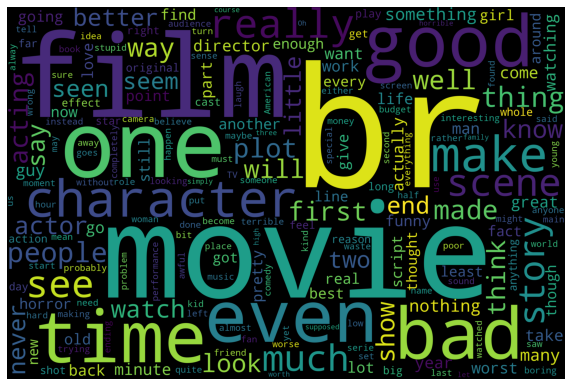

Positive:


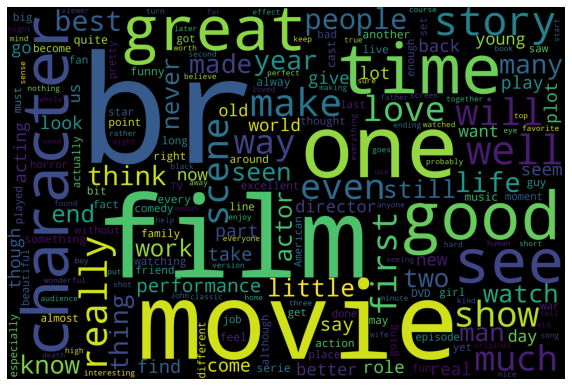

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

positive_corpus = df.loc[df['sentiment'] == 1]
positive_corpus = positive_corpus["text"].tolist()

negative_corpus = df.loc[df['sentiment'] == 0]
negative_corpus = negative_corpus["text"].tolist()

print("Negative:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(negative_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Positive:")
wordcloud2 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(positive_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2) 
plt.axis("off");
plt.show()

Is there something weird about these words? You can repeat the process multiple times to test your observations.
Is there something that will influence our approach? Think about it...

## Features extraction
Let's tackle the Sentiment Analysis task.

The scikit-learn library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the BoW representation (as tf-idf) of a corpus.

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [7]:
from sklearn.feature_extraction.text import  TfidfVectorizer

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['sentiment'].tolist())

Processing corpus

Shape of the matrix: (data points, features)
(25000, 74849)



Fitting on a corpus, the vectorizer creates an internal vocabulary that will be used to create the BoW representation.
The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

Do not try to print the whole vocabulary: it is quite large ;)

In [8]:
print(len(vectorizer.vocabulary_))

74849


Since the vocabulary will be quite big, by default X will be a *sparse* matrix (see scipy.sparse for more info).

In [9]:
print(X_train)

  (0, 12676)	0.1313099259536101
  (0, 15962)	0.1777346079137557
  (0, 68360)	0.1229986721751814
  (0, 24536)	0.05505775858428285
  (0, 24581)	0.09354020142704138
  (0, 43838)	0.07001943104022597
  (0, 39486)	0.10537557258383021
  (0, 33004)	0.03914355472291122
  (0, 62894)	0.17312472752350047
  (0, 6334)	0.05457008541075988
  (0, 59848)	0.09769303060838595
  (0, 66322)	0.04195779008217017
  (0, 65367)	0.1521832775155675
  (0, 68048)	0.21922028732621093
  (0, 38012)	0.22884879534458283
  (0, 12296)	0.18456888040107022
  (0, 41007)	0.1684643565938248
  (0, 64397)	0.1631616719206325
  (0, 63863)	0.13607005489176882
  (0, 19380)	0.16310582995625975
  (0, 3258)	0.03594387591781499
  (0, 33223)	0.17096044264023477
  (0, 4124)	0.05515511963026372
  (0, 1657)	0.10191721380728457
  (0, 66339)	0.07010125626407564
  :	:
  (24999, 38755)	0.06531052905357865
  (24999, 28216)	0.11543858084922934
  (24999, 47407)	0.04291262083041603
  (24999, 66474)	0.03402224701442869
  (24999, 28068)	0.072414780293

All the scipy tools are compatible with sparse matrices, but if you somehow need the traditional representation it is possible to convert it with the following command. Keep in mind that if the vocabulary and/or the dataset are large, the resulting array will be quite large, possibly occupying all the RAM.


```
X.toarray()
```



It is then possible to parse the test split likewise. Remember to use the transform function and not the fit_transform when working on the test set.

In [10]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['sentiment'].tolist())

## Training and Testing
It is now possible to choose one of the many models available in the sci-kit learn library, train it and test it.

In [11]:
# training and testing
from sklearn.svm import LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

In [12]:
# print results
from sklearn.metrics import classification_report

report_train = classification_report(Y_train, Y_pred_train, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Train
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Test
              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



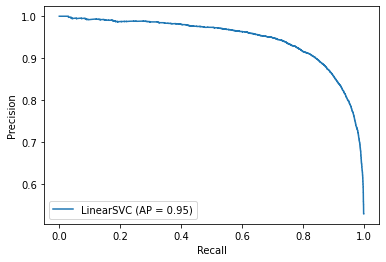

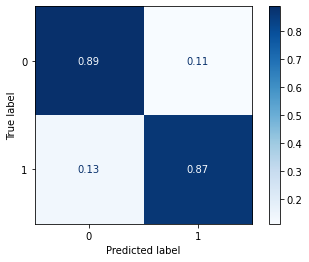

In [13]:
# more advanced tools
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

# Now...do it yourself!

Now, rather then sentiment classification, try to address the task of score prediction on the same dataset: based on the text of the reviews, try to predict the score assigned by the reviewer.

## First part
As first part, experiment with the options of the vectorizer to improve the classification using logistic regression. You are required to look at the documentation of the functions.
You can also use or add other pre-processing steps to the text if you feel like it, you are not obliged to use TfidfVectorizer.

Obviously, you will need to use the variable names declared in the first block, so to make our evaluation blocks work.


Some notes:
* Between the problem as regression and the problem as multi-class classification, the priority is the problem as regression. Indeed, the classification perspective does penalize each error in the same way, while the regression perspective considers the difference between the predicted value and the real value (prediction 8 for real value 2 is way worse than prediction 3 for value 2). The classification perspective is a tool to understand the problem better and experiment.
* In the multi-class classification, the most important measures are F1s (especially macro and micro), since it is a complex measure that considers more aspects than the simple accuracy. 
* It is not unusual to not reach a "satisfying" score, especially in the first step: our code makes use of a pretty simple classifier. Our purpose is to show you both the impact of the pre-processing and the choice of the classifier.
* There are no threshold values that you have to reach with the measurements to obtain a certain score. The score will be assigned based on the correctness of the methodology and the extent to which different solutions have been explored and discussed.
* In each code section, you have to deliver a single approach, but if you have observations or interesting alternative approaches, you can mention them in the .txt file

In [14]:
# write your code here
stop_words=["movie", "film", "one", "br", "character", "story", "and", "or", "this", "see"]
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df =.5)

X_train = vectorizer.fit_transform(train_corpus)
print("Shape of the matrix X_train: (data points, features)")
print(X_train.shape)
print()

Y_train = np.array(df_train['score'].tolist())
print("Shape of the matrix Y_train: (data points, features)")
print(Y_train.shape)
print()

X_test = vectorizer.transform(test_corpus)
print("Shape of the matrix X_test: (data points, features)")
print(X_test.shape)
print()

Y_test = np.array(df_test['score'].tolist())
print("Shape of the matrix Y_test: (data points, features)")
print(Y_test.shape)
print()

Shape of the matrix X_train: (data points, features)
(25000, 74819)

Shape of the matrix Y_train: (data points, features)
(25000,)

Shape of the matrix X_test: (data points, features)
(25000, 74819)

Shape of the matrix Y_test: (data points, features)
(25000,)



Now run the code below to train your classifier:

In [15]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train, Y_train)

Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test.astype(int))

####################################################################

Now test your results running the code below:

R2 score 0.482458
MAE 1.473840
MSE 6.306720

              precision    recall  f1-score   support

           1       0.53      0.83      0.64      5022
           2       0.22      0.06      0.10      2302
           3       0.28      0.12      0.17      2541
           4       0.32      0.33      0.33      2635
           7       0.33      0.24      0.28      2307
           8       0.27      0.24      0.25      2850
           9       0.22      0.04      0.07      2344
          10       0.48      0.76      0.59      4999

    accuracy                           0.42     25000
   macro avg       0.33      0.33      0.30     25000
weighted avg       0.36      0.42      0.37     25000

[[4154  151  142  250   31   47    6  241]
 [1391  140  197  320   42   36    8  168]
 [1044  158  309  608  116   84   11  211]
 [ 708  125  289  863  197  195   22  236]
 [ 124   24   68  289  547  574   64  617]
 [ 135   18   48  163  418  695   91 1282]
 [ 107    9   21   91  153  455   93 1415]
 [ 

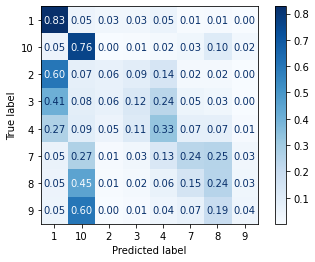

In [16]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test.astype(float), Y_pred_test.astype(float))))
print("MAE %f" % (mean_absolute_error(Y_test.astype(int), Y_pred_test.astype(int))))
print("MSE %f" % (mean_squared_error(Y_test.astype(int), Y_pred_test.astype(int))))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

####################################################################

## Second part
Now experiment both with the processing (the vectorizer) and the classifier to obtain the best result.

In [18]:
# write your code here
from sklearn.neighbors import NearestCentroid

stop_words=["movie", "film", "one", "br", "character", "story", "and", "or", "this", "see"]
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df =.5)

X_train = vectorizer.fit_transform(train_corpus)
print("Shape of the matrix X_train: (data points, features)")
print(X_train.shape)
print()

Y_train = np.array(df_train['score'].tolist())
print("Shape of the matrix Y_train: (data points, features)")
print(Y_train.shape)
print()

X_test = vectorizer.transform(test_corpus)
print("Shape of the matrix X_test: (data points, features)")
print(X_test.shape)
print()

Y_test = np.array(df_test['score'].tolist())
print("Shape of the matrix Y_test: (data points, features)")
print(Y_test.shape)
print()

classifier = NearestCentroid()

Shape of the matrix X_train: (data points, features)
(25000, 74819)

Shape of the matrix Y_train: (data points, features)
(25000,)

Shape of the matrix X_test: (data points, features)
(25000, 74819)

Shape of the matrix Y_test: (data points, features)
(25000,)



Run the code below to train your classifier, then test it with the block that follows.

In [19]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test.astype(int))
####################################################################

R2 score 0.341925
MAE 1.755720
MSE 8.019240

              precision    recall  f1-score   support

           1       0.59      0.57      0.58      5022
           2       0.20      0.20      0.20      2302
           3       0.20      0.18      0.19      2541
           4       0.27      0.26      0.27      2635
           7       0.25      0.32      0.28      2307
           8       0.23      0.23      0.23      2850
           9       0.20      0.20      0.20      2344
          10       0.51      0.51      0.51      4999

    accuracy                           0.35     25000
   macro avg       0.31      0.31      0.31     25000
weighted avg       0.36      0.35      0.36     25000

[[2858  743  453  322  140  130  108  268]
 [ 732  455  391  312  132   83   60  137]
 [ 446  439  467  537  281  134   78  159]
 [ 268  315  429  679  440  242  121  141]
 [  69   90  157  262  740  471  221  297]
 [  98   76  149  175  613  664  470  605]
 [  89   48   89   90  314  461  458  795]
 [ 

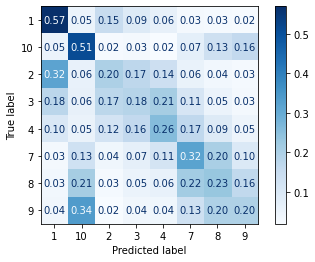

In [20]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test.astype(float), Y_pred_test.astype(float))))
print("MAE %f" % (mean_absolute_error(Y_test.astype(int), Y_pred_test.astype(int))))
print("MSE %f" % (mean_squared_error(Y_test.astype(int), Y_pred_test.astype(int))))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")
####################################################################

Credits:
Andrea Galassi,
Federico Ruggeri,
Paolo Torroni
(Oct 2020)